# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2021/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday October the 31st, 2021 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/


(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: ***DPZEV6***.)

### Overview

This year's Assignment 2 is all about analyzing the network of rappers.

Note that this time I'm doing the exercises slightly differently in order to clean things up a bit. The issue is that the weekly lectures/exercises include quite a few instructions and intermediate results that are not quite something you guys can meaningfully answer. 

Therefore, in the assignment below, I have tried to reformulate the questions from the weekly exercises into something that is (hopefully) easier to answer. *Then I also note which lectures each question comes from*; that way, you can easily go back and find additional tips & tricks on how to solve things 😇


----

# Assignment 2

This assignment uses the following formatted sections:

* Original exersize task is described with a bullet point. 

> **✅ Solution**: A solution to the task is marked with a checkmark.

> **📊 Graph**: A caption for a graph has a graph emoji.

> **💬 Comment**: An additional comment uses a speech bubble emoji.

> **❌ Error**: Errors have a red cross. 

Errors are only displayed when the code was not able to run properly, please ensure all previous code blocks are ran first.

Similar format is used for code print outputs and histograms. For these to work, please ensure the following code block is ran first:

In [1]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

def printmd(string):
    display(Markdown(string))

def create_histogram(data, title, xlabel, ylabel, color='tab:blue', figuresize=(10, 6)):
    labels = list(data.keys())
    values = list(data.values())

    n_bars = len(labels)
    figure_width = max(labels) - min(labels)

    bar_width = figure_width / (1.5 * n_bars)

    plt.figure(figsize=figuresize)
    plt.bar(labels, values, color=color, edgecolor='black', width=bar_width)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


printmd("> **✅ Solution**: The assignment code is prepared.")

> **✅ Solution**: The assignment code is prepared.

# Part 0: Building the network

 To create our network, we downloaded the rapper Wiki pages from each coast (during Week 4) and linked them via the hyperlinks connecting pages to each other. To achieve this goal we have used regular expressions.

* Explain the strategy you have used to extract the hyperlinks from the Wiki-pages, assuming that you have already collected the rapper pages with the Wikipedia API.

> **✅ Solution**: Firstly, we iterate over all the rapper text files and we add them as nodes in the network, while also including some attributes like `Coast` and `Content Length`. After that, we iterate again over all of the same files, doing the following:
> * We search for **all** Wikipedia internal links that follow a specific format (we do that with a regular expression, explained in the next section). 
> * Some times these links include more than one wording (separated by '|'), but we are only interested in the first one.
> * Then, we check if the resulting word or phrase is in the collection of rapper names we were given at the start of Week 4.
> * If it is, then we connect the rapper on which file we are iterating over, edge origin, to the rapper in the Wikipedia internal link, edge destination (the direction is important).

* Show the regular expressions you have built and explain in details how they work.

> **✅ Solution**: The expression is the following `\[\[(.*?)\]\]`, which essentially matches everything between double square brackets. In particular:
> * The square brackets `\[ \]` are *escaped* with a backlash (`\`) just so they are to matched literally.
> * The parenthesis `( )` form a group (although as it's only one group in the whole expression that we don't need to match as repeating, the parenthesis can be removed).
> * `.*?`: This is a part of the pattern enclosed in parentheses and it's the interesting part. It uses the following elements:
>   * `.`: This period (dot) is a metacharacter in regular expressions that matches any character except for a newline character.
>   * `*`: This asterisk is another metacharacter and it means "zero or more occurrences of the preceding element." So, `.*` means zero or more occurrences of any character.
>   * `?`: The question mark is another metacharacter, and when used after `*`, it makes the `*` operator non-greedy, meaning it matches as few characters as possible. Without the `?`, `.*` would be greedy and match as many characters as possible, so from the first link's `[[`, to the last link's `]]`.

# Part 1: Network visualization and basic stats

Visualize your network of rappers (from lecture 5) and calculate stats (from lecture 4 and 5). For this exercise, we assume that you have already generated the network and extracted the largest weakly connected component (the "largest weakly connected component" of a directed network is the subgraph consisting of the nodes that would constitute the largest connected component if the network were undirected) . The visualization and statistics should be done for the largest weakly connected component only.

In [2]:
import pickle

# Load graph object from pickle file that we saved in lecture 4
G = pickle.load(open('./Week4_graph.pickle', 'rb'))
SEED = 1234

# Extract the largest weakly connected component
import networkx as nx

largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()
DIRECTED_GRAPH = G.copy()
UNDIRECTED_GRAPH = G.to_undirected()

## _Exercise 1a_: Stats (see lecture 4 and 5 for more hints)

* What is the number of nodes in the network?

In [3]:
printmd(f"> **✅ Solution**: Number of nodes: {len(G.nodes)}")

> **✅ Solution**: Number of nodes: 727

* What is the number of links?

In [4]:
printmd(f"> **✅ Solution**: Number of edges: {len(G.edges)}")

> **✅ Solution**: Number of edges: 5803

* Who is the top connected rapper? (Report results for the in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?

In [5]:
G = DIRECTED_GRAPH
most_connected_in = sorted(dict(G.in_degree).items(), key=lambda x:x[1], reverse=True)
most_connected_out = sorted(dict(G.out_degree).items(), key=lambda x:x[1], reverse=True)
rapper = most_connected_in[0][0]
degree = most_connected_in[0][1]
in_neighbours = [ u for u,v in G.edges if v == rapper]
out_neighbours = [ v for u,v in G.edges if u == rapper]
to_print = ""
to_print += f"> ✅ We will comment on the most in-connected rapper and out-connected rappers, with additional information like if they are referred back and they opposite type of degree, as it seems important in figuring out the status of the rapper."
to_print += (f'''
> * **In-degrees**:
> 	* Name: {rapper}
> 	* In-Degree: {len(in_neighbours)}
> 	* Out-Degree: {len(out_neighbours)}
> 	* Refers back {100*len([el for el in in_neighbours if el in out_neighbours])/len(in_neighbours):.2f}%''')
rapper = most_connected_out[0][0]
degree = most_connected_out[0][1]
in_neighbours = [ u for u,v in G.edges if v == rapper]
out_neighbours = [ v for u,v in G.edges if u == rapper]
to_print += (f'''
> * **Out-degrees**:
> 	* Name: {rapper}
> 	* Out-Degree: {len(out_neighbours)}
>   * In-Degree: {len(in_neighbours)}
> 	* Referred back {100*len([el for el in out_neighbours if el in in_neighbours])/len(out_neighbours):.2f}%''')

printmd(to_print)

> ✅ We will comment on the most in-connected rapper and out-connected rappers, with additional information like if they are referred back and they opposite type of degree, as it seems important in figuring out the status of the rapper.
> * **In-degrees**:
> 	* Name: Snoop Dogg
> 	* In-Degree: 127
> 	* Out-Degree: 22
> 	* Refers back 15.75%
> * **Out-degrees**:
> 	* Name: Drag-On
> 	* Out-Degree: 52
>   * In-Degree: 6
> 	* Referred back 5.77%

> ✅ In the case of the rapper with the largest in-degree, *Snoop Dog*, it makes sense since he's a really popular and prolific rapper, who has probably influenced a lot of other rappers. He refers back to only $15.75\%$ of the rappers that link to him. This is in consistent with his high popularity, as a lot of rappers can point to his influence without the need of mentioning them in Snoop's Wikipedia article, as these articles do not have to grow in length at the same rythm that links to it grow.
>
> However, the case of the rapper with the largest out-degree, *Drag-on, is completely different. If we look at his Wikipedia article, we can see with the naked eye that the article is not long, but the density of links is very high. In conjunction with the fact that he very rarely is referred back ($5.75\%$) and his very low In-Degree ($6$) a good assumption is that he has contributed to some events in a minor role or as a guest with a lot of other rappers, and a very eager Wikipedia contributor has registered it in his article.

* Who are the top 5 most connected east-coast rappers (again in terms of in/out-degree)? 

In [6]:
east_rappers = [node for node in G.nodes if G.nodes[node]['coast'] == 'east']
west_rappers = [node for node in G.nodes if G.nodes[node]['coast'] == 'west']
to_print = "> ✅ Those are:"
to_print += (f'''
> * **East**:
>   * *In-degree (in descending order)*:''')
for (rapper ,degree) in [(name, degree) for (name, degree) in most_connected_in if name in east_rappers][:5]:
    to_print += (f'''
    >       * {rapper} ({degree})''')
to_print += (f'''
>   * *Out-degree (in descending order)*:''')
for (rapper ,degree) in [(name, degree) for (name, degree) in most_connected_out if name in east_rappers][:5]:
    to_print += (f'''
    >       * {rapper} ({degree})''')

printmd(to_print)

> ✅ Those are:
> * **East**:
>   * *In-degree (in descending order)*:
    >       * Jay-Z (114)
    >       * Nas (98)
    >       * 50 Cent (91)
    >       * Busta Rhymes (82)
    >       * The Notorious B.I.G. (63)
>   * *Out-degree (in descending order)*:
    >       * Drag-On (52)
    >       * Black Thought (42)
    >       * Jahlil Beats (35)
    >       * MC Lyte (35)
    >       * Uncle Murda (34)

* Who are the top 5 most connected west-coast rappers (again in terms of in/out-degree)?

In [7]:
to_print = "> ✅ Those are:"
to_print += (f'''
> * **West**:
>   * *In-degree (in descending order)*:''')
for (rapper ,degree) in [(name, degree) for (name, degree) in most_connected_in if name in west_rappers][:5]:
    to_print += (f'''
    >       * {rapper} ({degree})''')
to_print += (f'''
>   * *Out-degree (in descending order)*:''')
for (rapper ,degree) in [(name, degree) for (name, degree) in most_connected_out if name in west_rappers][:5]:
    to_print += (f'''
    >       * {rapper} ({degree})''')

printmd(to_print)

> ✅ Those are:
> * **West**:
>   * *In-degree (in descending order)*:
    >       * Snoop Dogg (127)
    >       * Dr. Dre (81)
    >       * Kendrick Lamar (75)
    >       * Tupac Shakur (70)
    >       * E-40 (60)
>   * *Out-degree (in descending order)*:
    >       * DJ Dahi (38)
    >       * Dr. Dre (36)
    >       * The Game (rapper) (36)
    >       * Kendrick Lamar (36)
    >       * Kurupt (35)

* Plot the in- and out-degree distributions for the whole network. 
   * Use axes that make sense for visualizing this particular distribution.
   * What do you observe? 
   * Give a pedagogical explaination of why the in-degree distribution is different from the out-degree distribution?

In [8]:
import numpy as np
import math
def degree_distribution_plot(d1, label1, d2, label2, title="", n_bins=100, figsize=(15,7), fig = None, ax = None):
    d1 = list(d1)
    d2 = list(d2)
    bins = np.linspace(min(d1+d2), max(d1+d2), n_bins)
    
    frq1, edges1 = np.histogram(a= d1, bins=bins)
    frq2, edges2 = np.histogram(a= d2, bins=bins)

    import matplotlib.pyplot as plt
    from math import log
    if(fig == None and ax == None):
        fig, ax = plt.subplots(1, 1)
    if(title != ""):
        fig.suptitle(title, fontsize=16)
    fig.set_figheight(figsize[1])
    fig.set_figwidth(figsize[0])

    ax.hist(edges1[:-1], n_bins, weights=frq1, label=label1, alpha = 0.7)
    ax.hist(edges2[:-1], n_bins, weights=frq2, label=label2, alpha = 0.7)
    ax.set_xlabel("k")
    ax.set_ylabel("count")
    ax.legend()
    ax.spines['bottom'].set_visible(False)

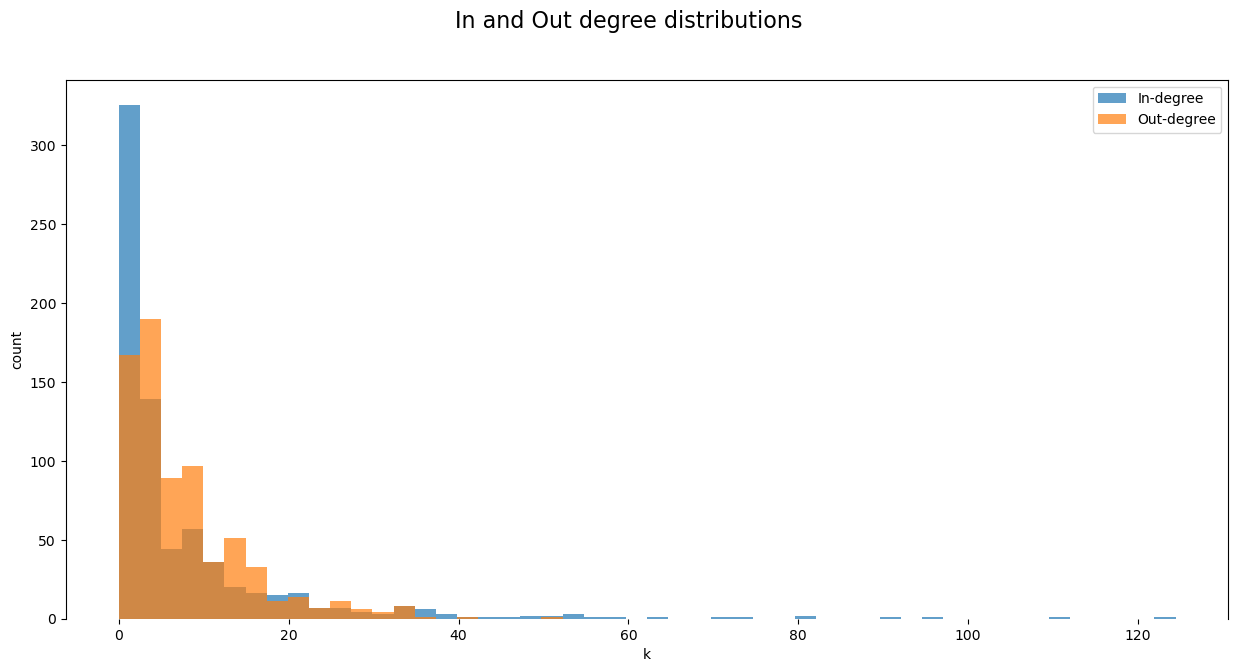

In [9]:
degree_distribution_plot(dict(G.in_degree).values(), "In-degree", dict(G.out_degree).values(), "Out-degree", title='In and Out degree distributions', n_bins=50)

> **📊 Graph**: In this plot we can see the in-degree and out-degree distributions superposed in the form of two histograms. Both are divided into the same bins and the y-axis line has been removed so the bars that are too little (because the count is very low) can be seen, because as degree increases, there are less node counts and more distributed along the x-axis. It's important to show that there are hubs.

> **✅ Solution**: A substantial proportion of rappers exhibit low in-degrees, implying that most rappers are infrequently referenced in the pages of their peers. Nonetheless, there exists a distinct subset of rappers who likely hold greater influence within hip-hop culture, as they are frequently mentioned. A similar pattern emerges when examining out-degrees, although high out-degrees are less common, and a larger number of rappers have low or moderate out-degrees. This observation is likely tied to the length of Wikipedia articles dedicated to each rapper.
> 
> This pattern can be attributed to the fact that, in the context of every rapper's Wikipedia article, there tend to be mentions of their influences and associates, even if these figures do not reciprocally reference them. However, the out-degree is also constrained by the length of the Wikipedia article, which depends on the rapper's achievements and the level of interest among Wikipedia contributors to include such information.

* Find the exponent (by using the `powerlaw` package) for the in- and out-degree distributions. What does it say about our network?

In [10]:
import powerlaw
in_alpha = powerlaw.Fit(list(dict(G.in_degree).values())).alpha
out_alpha = powerlaw.Fit(list(dict(G.out_degree).values())).alpha
total_alpha = powerlaw.Fit(list(dict(G.degree).values())).alpha

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


In [11]:
to_print = (f'''
> **✅ Solution**: Exponents of the degree distribution:
>    * In: {in_alpha:.2f}
>    * Out: {out_alpha:.2f}
>    * Total: {total_alpha:.2f}
''')
printmd(to_print)


> **✅ Solution**: Exponents of the degree distribution:
>    * In: 2.73
>    * Out: 12.24
>    * Total: 3.53


> **✅ Solution**: This tells us that the in-degree distribution functions as a scale-free network ($2 < \lambda < 3$), while the total-degree and out-degree distributions (the latter is really clear) works as random networks ($\lambda > 3$). This makes sense, as the *hubs* are really popular rappers that we have seen through the exercises that really do function as hubs. These findings are consistent with the paper provided.

* Compare the two degree distributions to the degree distribution of a *random network* (undirected) with the same number of nodes and probability of connection *p*. Comment your results.

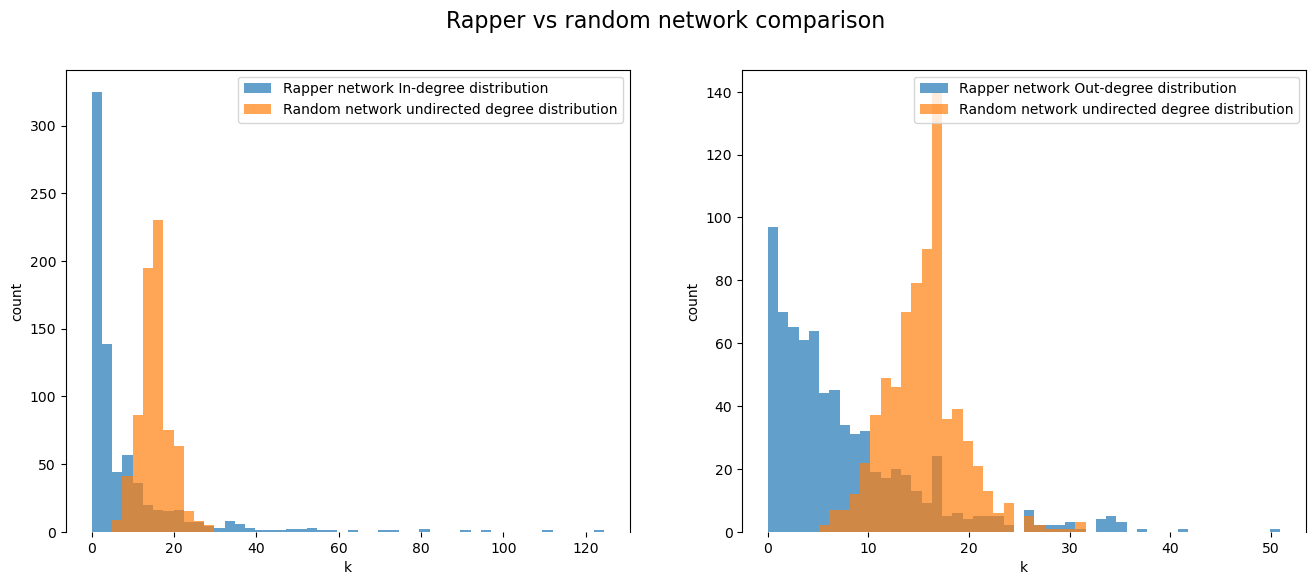

In [12]:
import matplotlib.pyplot as plt
G = DIRECTED_GRAPH
N = len(G.nodes)
p =  len(G.edges)/(N*(N-1)/2)
random_G = nx.gnp_random_graph(N,p, seed=SEED)
fig, (ax1, ax2) = plt.subplots(1, 2)
degree_distribution_plot(dict(G.in_degree).values(), "Rapper network In-degree distribution", 
    dict(random_G.degree).values(), "Random network undirected degree distribution", title='Rapper vs random network comparison', n_bins=50, figsize=(16,6), fig = fig, ax=ax1)
degree_distribution_plot(dict(G.out_degree).values(), "Rapper network Out-degree distribution", 
    dict(random_G.degree).values(), "Random network undirected degree distribution", title='Rapper vs random network comparison', n_bins=50, figsize=(16,6), fig = fig, ax=ax2)

> **📊 Graph**: In this figure there's two plots that compare both the rapper network's In-degree and Out-degree distributions to the degree distribution of a random network with the same number of nodes and probability of forming a link. The random network is undirected, so we can only extract the total degree distribution. Also, note that the scales of both plots are different, both in the y-axis and the x-axis. The plot on the left has a bigger range in both axis.

> **✅ Solution**: At first glance it's obvious that both rapper network degree distributions are much more weighted towards low degrees, meaning there's a lot of very little connected nodes. Additionally, in both distributions, there is a notable elongation in the tail towards higher degrees, uggesting the presence of a limited number of nodes that are thinly dispersed across a wide range of high degrees. Both of these properties are much more pronounced in the In-degree distribution, which is consistent with the exponent calculated in the last section, since it indicates its scale free nature, characterized by an abundance of low-degree nodes and a scarcity of hubs, which are nodes with exceedingly high degrees.

In [13]:
random_alpha = powerlaw.Fit(list(dict(random_G.degree).values())).alpha
printmd(f"> **💬 Comment**: The random network degree distribution exponent is {random_alpha:.2f}")

Calculating best minimal value for power law fit


> **💬 Comment**: The random network degree distribution exponent is 12.05

> **💬 Comment**: However, it's also worth mentioning that the out-degree could look like as a distribution between the random-network and in-degree distribution (scale-free network), since the mean of the distributin is more weighted towards low degrees and the the presence of a significant tail towards higher degrees, **but** the exponent of the random network is very similar to the out-degree distribution (or even lower) so that would make the first-glanced observation less obvious and could even disprove it.

## _Exercise 1b_: Visualization (see lecture 5 for more hints)

* Create a nice visualization of the total (directed) network:
   * Color nodes according to the role;
   * Scale node-size according to degree;
   * Get node positions based on either the Force Atlas 2 algorithm, or the built-in algorithms for networkX;
   * Whatever else you feel like that would make the visualization nicer.

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

G = DIRECTED_GRAPH
node_colors_dict = {"west": "yellow", "east": "purple"}
color_a = "orange"
color_b = "cyan"
color_c = "grey"
edge_colors_dict = {"west-east": color_c, "east-west": color_c, "west-west": color_a, "east-east": color_b}
edge_widths_dict = {"west-east": 0.5, "east-west": 0.5, "west-west": 0.2, "east-east": 0.2}
node_colors = [node_colors_dict[G.nodes[n]['coast']] for n in G.nodes()]
edge_colors = [edge_colors_dict[f"{G.nodes[u]['coast']}-{G.nodes[v]['coast']}"] for (u, v) in G.edges()]
edge_widths = [edge_widths_dict[f"{G.nodes[u]['coast']}-{G.nodes[v]['coast']}"] for (u, v) in G.edges()]

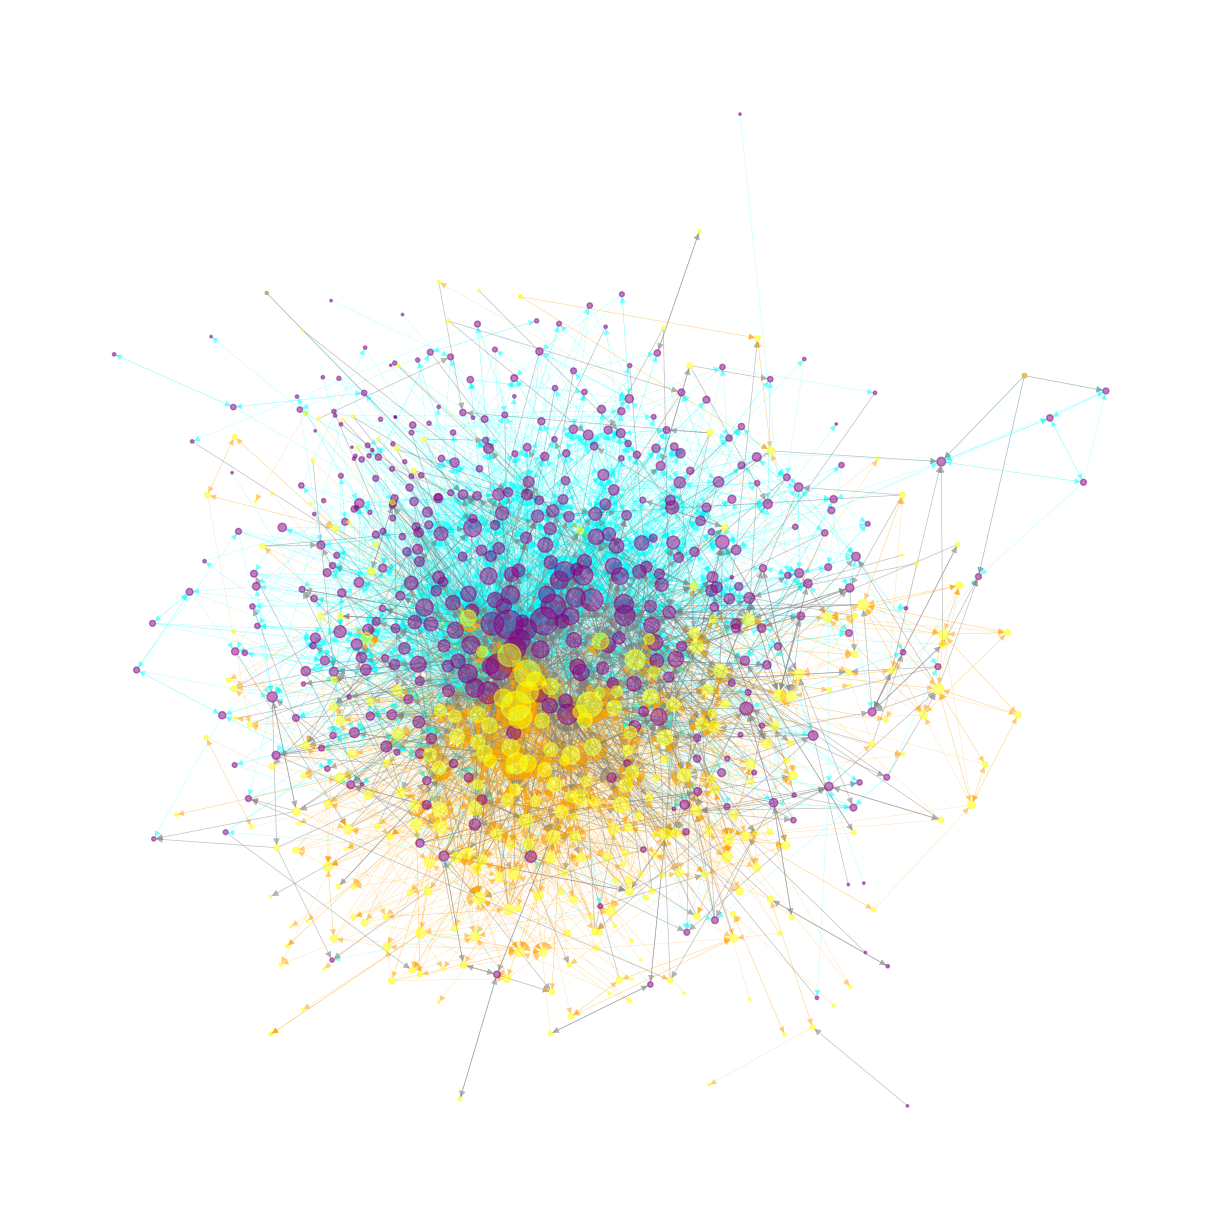

In [32]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(12,12))
d = dict(G.degree)
nx.draw_kamada_kawai(G, node_size=[v * 3 for v in d.values()], node_color = node_colors, edge_color=edge_colors,width=edge_widths, alpha=0.5)

In [36]:
printmd(f''' 
> **📊 Graph**: In this graph:
> * East coast and west coast rappers are represented as {node_colors_dict["east"]} and {node_colors_dict["west"]} nodes, respectively. 
> * The edges are: 
>   * {edge_colors_dict["east-east"]} if there's a link between to east coast rappers
>   * {edge_colors_dict["west-west"]} if there's a link between to west coast rappers
>   * {edge_colors_dict["east-west"]} if there's a link between the two coasts
> * Node size depends on total degree
> * Inter-coastal links are wider than intra-coastal links, since those are rarer.
''')

 
> **📊 Graph**: In this graph:
> * East coast and west coast rappers are represented as purple and yellow nodes, respectively. 
> * The edges are: 
>   * cyan if there's a link between to east coast rappers
>   * orange if there's a link between to west coast rappers
>   * grey if there's a link between the two coasts
> * Node size depends on total degree
> * Inter-coastal links are wider than intra-coastal links, since those are rarer.


* Describe the structure you observe. What useful information can you decipher from this?

> **✅ Solution**: Evidently, both coasts predominantly maintain their distinct network clusters, resulting in a graph that exhibits clear partitions. Notably, there are occasional exceptions, but they tend to be quite minor. Interestingly, the boundaries between these partitions become somewhat ambiguous toward the center of the graph, particularly where larger nodes are situated. This observation aligns with the presence of a notably higher number of connections between rappers from different coasts.
> 
> Furthermore, as previously discussed, the network comprises a limited number of highly prominent nodes and a multitude of smaller ones. However, if the node size were determined solely by in-degrees instead of total degrees, this disparity would be far more pronounced. In the current scenario, the total degree distribution closely approximates a power-law distribution with an exponent near 3, though it falls short of exhibiting true scale-free properties.

# Part 2: Word-clouds

Create your own version of the word-clouds (from lecture 7). For this exercise we assume you know how to download and clean text from rappers' Wikipedia pages.

Here's what you need to do:
> * Create a word-cloud for each coast according to the novel TF-TR method. Feel free to make it as fancy as you like. Explain your process and comment on your results.

> **✅ Solution**: Step 1 - create a method to process the obtained text files and run it on each coast's folder.

> **💬 Comment**: An archive of articles in text format can be found here: [east coast](https://github.com/SocialComplexityLab/socialgraphs2023/raw/main/files/eastcoasttexts.zip) and [west coast](https://github.com/SocialComplexityLab/socialgraphs2023/raw/main/files/westcoasttexts.zip) (from [the lecturer's repository](https://github.com/SocialComplexityLab/socialgraphs2023/tree/main/files)). Ensure the folder paths match before running the code.

In [14]:
import nltk
import string
import os
from nltk.stem import WordNetLemmatizer

def process_texts(directory):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            filepath = os.path.join(directory, filename)

            # 1. Open the text file
            with open(filepath, 'r', encoding='utf-8') as file:
                text = file.read()

            # 2. Tokenize the pages into individual strings
            tokens = nltk.word_tokenize(text)

            # 3. Remove all punctuation from the list of tokens
            tokens_no_punct = [word for word in tokens if word not in string.punctuation]

            # 4. Set everything to lower case
            tokens_lower = [word.lower() for word in tokens_no_punct]

            # 5. Lemmatize the words
            lemmatized_tokens.extend([lemmatizer.lemmatize(word) for word in tokens_lower])

    return lemmatized_tokens

# Create the token lists
east_coast_token_list = process_texts('../lectures/lecturer_data/eastcoasttexts')
west_coast_token_list = process_texts('../lectures/lecturer_data/westcoasttexts')

> **✅ Solution**: Step 2 - count the occurrences of each term, sort by frequency, save the results into lists.

In [15]:
from collections import Counter

def create_tf_list(tokens):

    # Count the occurrences of each term
    term_frequencies = Counter(tokens)

    # Convert the term frequencies to a list of tuples and sort by frequency
    tf_list = sorted(term_frequencies.items(), key=lambda x: x[1], reverse=True)

    return tf_list

# Create the TF lists
east_coast_tf_list = create_tf_list(east_coast_token_list)
west_coast_tf_list = create_tf_list(west_coast_token_list)

> **✅ Solution**: Step 3 - create new lists with adjusted weights, using the lecturer's algorithm:
> * Words that are unique to target coast get a high weight
> * Words that are unique to the opposite coast get a low weight
> * Words that occur at the same frequency on both lists are neutral

> **💬 Comment**: Algorithm explanation and example [from lecture 7](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/lectures/Week7.ipynb), wording adjusted for brevity:
> 
> The word `california` occurs 458 times in the West Coast TF list and 87 times in the East Coast TF list, thus its West Coast weight is set to
> 
> $$w_\textrm{california}^{(m)} = \frac{458}{87 + c} = 4.28.$$
> 
> Similarly, its East Coast weight is 
> 
> $$w_\textrm{california}^{(d)} = \frac{87}{458 + c} = 0.18.$$
> 
> In both cases, the constant $c$ is added to the denominator in case a word occurs zero times.
> 
> In general for some token $t$ with term frequency $\textrm{TF}^{(u)}_t$, in coast $u$ where $u \in \{w,e\}$, the weight is defined as:
> 
> $$w_{t}^{(w)} = \frac{\textrm{TF}^{(w)}_t}{ \textrm{TF}^{(e)}_t + c}, \qquad \textrm{and} \qquad w_{t}^{(e)} = \frac{\textrm{TF}^{(e)}_t}{ \textrm{TF}^{(w)}_t + c}. $$
> 
> Now the lists can be made for both coasts, where the ranking of token $t$ on list $u$ is given by $\textrm{TF}^{(u)}_t \times w_{t}^{(u)}$. These are called the *TF-TR* lists.

In [16]:
def process_tf_tr_list(tf_list, comparison_tf_list, c):
    # Convert the comparison term frequency list to a dictionary for easy access
    comparison_tf_dict = dict(comparison_tf_list)

    # Calculate the total term frequency in the input and comparison list
    total_terms = sum(tf for _ , tf in tf_list)
    total_comparison_terms = sum(comparison_tf_dict.values())

    # Normalize the term frequency in the input and comparison list
    normalized_tf_list = [(word, tf / total_terms) for word, tf in tf_list]
    normalized_comparison_tf_dict = {word: tf / total_comparison_terms for word, tf in comparison_tf_dict.items()}

    # Calculate the TF-TR list
    tf_tr_list = [(word, (tf) / (normalized_comparison_tf_dict.get(word, 0) + c)) for word, tf in normalized_tf_list]
    
    # Sort the TF-TR list in descending order
    tf_tr_list = sorted(tf_tr_list, key=lambda x: x[1], reverse=True)
    
    return tf_tr_list

# Constant c as described above
c = 0.0001

# Create the TF-TR lists
east_coast_tf_tr_list = process_tf_tr_list(east_coast_tf_list, west_coast_tf_list, c)
west_coast_tf_tr_list = process_tf_tr_list(west_coast_tf_list, east_coast_tf_list, c)

> **✅ Solution**: Step 4 - convert the list of tuples to a dictionary, then generate the word cloud image.

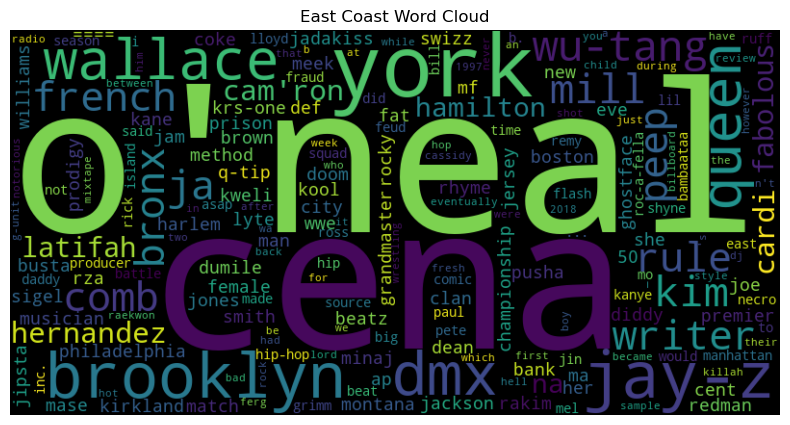

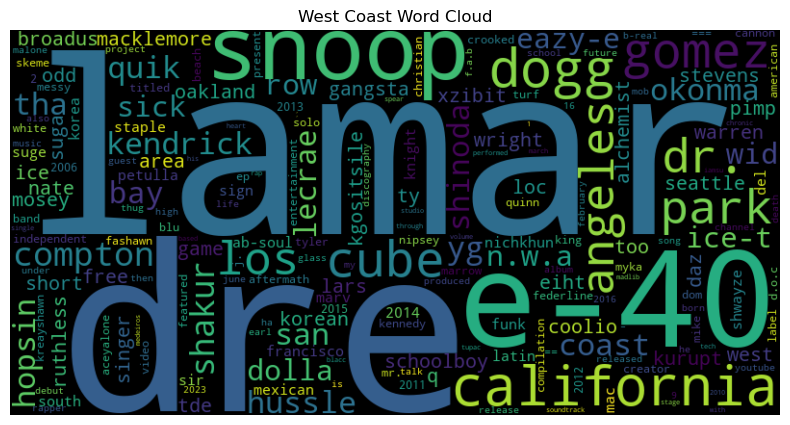

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def create_wordcloud(tf_tr_list, title):
    # Convert the list of tuples to a dictionary
    word_freq_dict = {word: freq for word, freq in tf_tr_list}

    # Create the word cloud object. 
    # We are not looking for word pairs here, so collocations = false disables that feature.
    wordcloud = WordCloud(collocations=False, width=800, height=400).generate_from_frequencies(word_freq_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis('off')

# Generate word clouds
create_wordcloud(east_coast_tf_tr_list, "East Coast Word Cloud")
create_wordcloud(west_coast_tf_tr_list, "West Coast Word Cloud")

> **📊 Graph**: East and West Coast word graphs.

> * For each coast, what are the 5 words with the highest TR scores? Comment on your result.

In [18]:
def highest_tr(prefix, list):
    # Convert each item to a string in the desired format
    formatted_items = ["> 1. **{}:** {}".format(k, round(float(v), 2)) for k, v in list[:5]]

    # Join the string items with a newline character to create a single string
    formatted_string = "\n".join(formatted_items)

    # Print the list with an explaining prefix
    printmd(prefix + "\n" + formatted_string)

highest_tr("> **✅ Solution**: East Coast words with highest TR scores, in the format `word: rounded score`", east_coast_tf_tr_list)
highest_tr("> **✅ Solution**: West Coast words with highest TR scores, in the format `word: rounded score`", west_coast_tf_tr_list)

> **✅ Solution**: East Coast words with highest TR scores, in the format `word: rounded score`
> 1. **o'neal:** 5.57
> 1. **cena:** 5.19
> 1. **york:** 3.94
> 1. **jay-z:** 3.58
> 1. **brooklyn:** 3.5

> **✅ Solution**: West Coast words with highest TR scores, in the format `word: rounded score`
> 1. **lamar:** 6.18
> 1. **dre:** 5.72
> 1. **e-40:** 5.23
> 1. **snoop:** 5.16
> 1. **california:** 5.07

> **💬 Comment**: Observations from the solutions:
> - Location names _California_, _Brooklyn_ and _[New] York_ are listed
> - East Coast's top 5 has two words over the score of five and others below the score of four 
> - West Coast's top 5 consists of only words that score five or higher, with one of them being over six
> - On the list, only _E-40_ and _Jay-Z_ are individual rapper names, and both contain punctuation (a dash). Others are compounds that are missing the second word (e.g. _Snoop Dogg_).

# Part 3: Communities

Find communities and their modularity (from lecture 7).

Here's what you need to do:


 * In your own words, explain what the measure "modularity" is, and the intuition behind the formula you use to compute it. 


> **✅ Solution**:
>
> The equation $ M_c = \frac{L_c}{L} - \left( \frac{k_c}{2L} \right)^2 $ (9.11 from the [book](http://networksciencebook.com/chapter/9#modularity))  measures how tightly-knit a community is in a network.
>
> - $ M_c $: This is the modularity for a specific group or community. It's like a score that tells us how close the members of that group are to each other.
>
> - $ L_c $: This counts how many connections (or links) are there between members inside that community.
>
> - $ L $: This counts all the connections in the entire network.
>
> - $ k_c $: This adds up the number of connections each member of the community has.
>
>The formula works by comparing how many connections are inside the community with what we might expect just by chance. If $ M_c $ is high, it means the community is more interconnected than we'd expect randomly. If it's low, the community is pretty much like a random set of connections.

* Find communities in the network

In [19]:
import community as community_louvain

rap_graph = UNDIRECTED_GRAPH.copy()
partition = community_louvain.best_partition(rap_graph, random_state=SEED)

* ...and explain how you chose to identify the communities: Which algorithm did you use and how does it work?


> **✅ Solution**:
>
> **Algorithm Chosen:** Louvain Community Detection
>
> **How It Works:**
> 1. **Initialization:** Each node in the network starts as its own community.
> 2. **Local Optimization:** For every node, the algorithm checks if moving it to a neighboring community would increase the modularity (the score that measures community strength). If yes, the move is made.
> 3. **Community Aggregation:** Once all nodes are checked and no more beneficial moves can be made, each community is contracted into a single node, and the process starts over with this new, simplified network.
> 4. **Iterative Process:** Steps 2 and 3 are repeated iteratively until no further improvement in modularity is possible.
 

* Comment on your results:
    * How many communities did you find in total?


In [20]:
printmd(f"> **✅ Solution**: Number of communities: {max(partition.values()) + 1}")

> **✅ Solution**: Number of communities: 9

   * Compute the value of modularity with the partition created by the algorithm.


In [21]:
modularity_value = community_louvain.modularity(partition, rap_graph)

printmd(f"> **✅ Solution**: Modularity: {modularity_value:.3f}")

> **✅ Solution**: Modularity: 0.409

>   * Plot and/or print the distribution of community sizes (whichever makes most sense). Comment on your result.


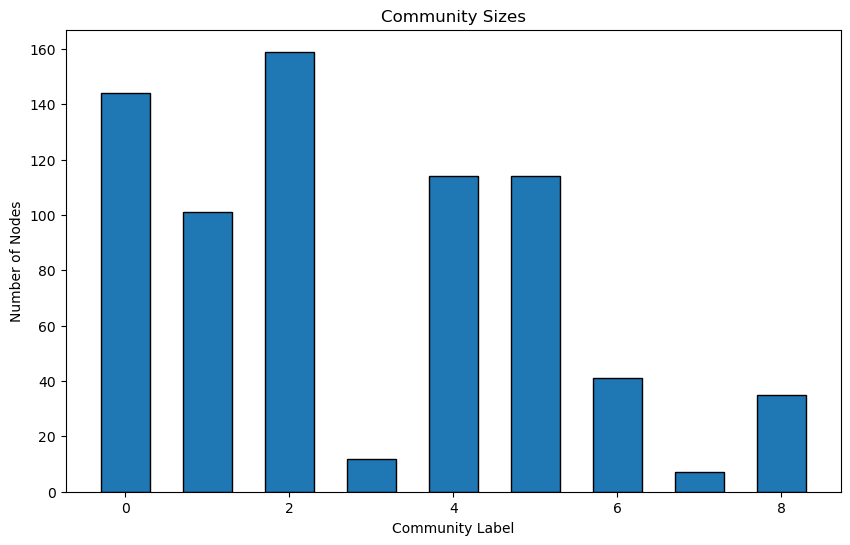

In [22]:
community_labels = list(partition.values())
create_histogram(Counter(community_labels), 'Community Sizes', 'Community Label', 'Number of Nodes')

> **📊 Graph**: The bar chart depicts the sizes of various communities identified in a network. Each bar represents a community, labeled from 0 to 8. While communities 0, 2, 4, and 6 have a significant number of nodes, reaching up to around 160 for some, others like communities 5 and 7 have notably fewer nodes. This variation indicates a diverse distribution of node concentrations across different communities in the network.

* Now, partition your rappers into two communities based on which coast they represent.
  * What is the modularity of this partition? Comment on the result.

In [23]:
def calculate_modularity(graph: nx.Graph):
    L = graph.number_of_edges()
    communities = ["west", "east"]
    
    communities_nodes =[]
    for community in communities:
        communities_nodes.append([n for n, attr in graph.nodes(data=True) if attr['coast'] == community])
    
    return nx.community.modularity(graph, communities_nodes)


modularity = calculate_modularity(rap_graph)
printmd(f"> **✅ Solution**: The modularity of the partition is: {modularity:.3f}")

> **✅ Solution**: The modularity of the partition is: 0.250

> **📝 Comment**: The modularity of the partition based on the coast is *0.250*, which is relatively low. This suggests that partitioning rappers solely by coast. might not capture the most meaningful or tight-knit community structure within the network. In other words, while there might be some clustering based on geographical location, other factors play a significant role in the community formation among these rappers.


# Part 4: Sentiment of communities

Analyze the sentiment of communities (lecture 8). More tips & tricks can be found, if you take a look at Lecture 8's exercises.

Here's what you need to do (use the LabMIT wordlist approach):

* Calculate and store sentiment for every rapper


> **✅ Solution**: Creating methods for calculating sentiments based on the [LabMIT Data Set S1](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752#pone.0026752.s001) word list.

In [24]:
import re
ROOT_FOLDER = "../lectures/data/"

# Create a dictionary out of the word list
labmt_dict = {}
with open('../lectures/data/labMIT-1.0.txt', 'r') as file:
    lines = file.readlines()

    # Skip the header row
    for line in lines[1:]:

        # Separate column by the tab character
        parts = line.strip().split('\t')

        # Get specific columns to create a dictionary
        word = parts[0]
        score = float(parts[2])
        labmt_dict[word] = score

def extract_filename_from_name(rap_name, root_folder, coast):
    
    # Handle edge case for "K-the-I???" by encoding the question marks
    safe_name = rap_name.replace("?", "%3F")

    filename = f"{root_folder}{coast}/{safe_name}.txt"
    return filename

def read_text_from_file(filename):
    try:
        with open(filename, "r", encoding="utf-8") as f:
            return f.read()
    except Exception as e:
        print(f"An error occurred while processing the file {filename}")
        return None
    
def tokenize_text(text):
    # Get each word from the text as tokens
    return re.findall(r'\b\w+\b', text.lower())

def calculate_sentiment(tokens):
    total_score = 0
    num_tokens = 0
    
    for token in tokens:
        if token in labmt_dict:
            # Sum the score
            total_score += labmt_dict[token]
            
            # Count total number of tokens
            num_tokens += 1
            
    if num_tokens == 0:
        return 0
    
    return total_score / num_tokens

def add_sentiment_to_nodes(net, root_folder):
    coast_path_dictionary={
        "east": "east_coast",
        "west": "west_coast"
    } 
    for node, attrs in net.nodes(data=True):
        # Read the file
        coast = coast_path_dictionary[attrs['coast']]
        filename = extract_filename_from_name(node, root_folder, coast)
        text = read_text_from_file(filename)
        if text is None:
            continue

        # Get tokens and sentiment
        tokens = tokenize_text(text)
        sentiment = calculate_sentiment(tokens)
        
        net.nodes[node]['sentiment'] = sentiment

# Create a copy of the graph and add sentiment
rap_graph_with_sentiment = DIRECTED_GRAPH.copy()
add_sentiment_to_nodes(rap_graph_with_sentiment, ROOT_FOLDER)

* Create a histogram of all rappers' associated sentiments.


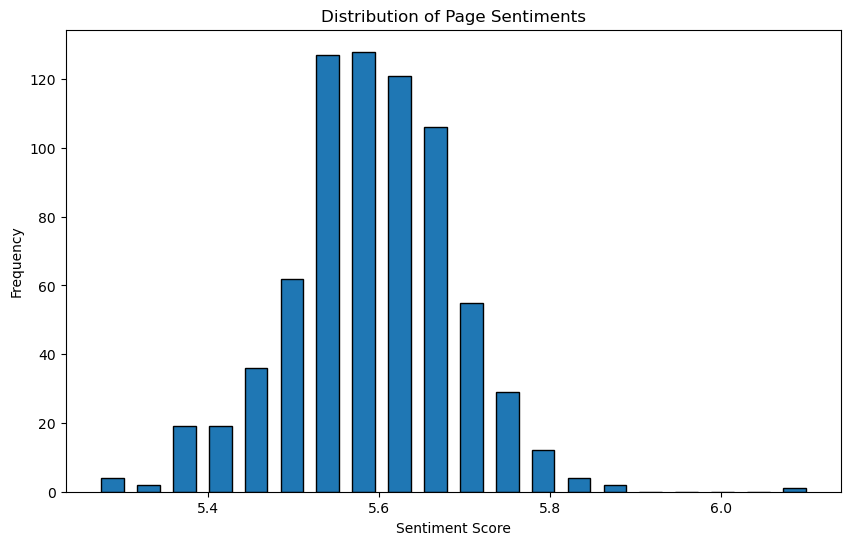

In [25]:
import numpy as np
sentiments = [attrs['sentiment'] for _, attrs in rap_graph_with_sentiment.nodes(data=True)]

hist, bin_edges = np.histogram(sentiments, bins=20)
bins = (bin_edges[:-1] + bin_edges[1:])/2
data_for_plot = { selected_bin: value for value, selected_bin in zip(hist,bins)}

create_histogram(data_for_plot, "Distribution of Page Sentiments", "Sentiment Score", "Frequency")

> **📊 Graph**: The graph displays a near-normal distribution of page sentiments centered around a score of approximately 5.7. The small standard deviation indicates that most sentiment scores are closely packed around this central value. One outlier can be seen with sentiment above 6 but it's due to vert short wiki page

* What are the 10 rappers with happiest and saddest pages?


In [26]:
def top_and_bottom_rappers_by_sentiment(net):
    sorted_rappers = sorted(net.nodes(data=True), key=lambda x: x[1]['sentiment'])
    
    bottom_10 = sorted_rappers[:10]
    top_10 = sorted_rappers[-10:]
    
    result_str = "> **✅ Solution**:\n>\n"
    result_str += "> 10 Rappers with the Saddest Pages:\n"
    for i, (rapper, attrs) in enumerate(bottom_10, 1):
        result_str += f"> {i}. {rapper} (Sentiment: {attrs['sentiment']:.2f})\n"
        
    result_str += " >\n> 10 Rappers with the Happiest Pages:\n"
    for i, (rapper, attrs) in enumerate(reversed(top_10), 1):
        result_str += f"> {i}. {rapper} (Sentiment: {attrs['sentiment']:.2f})\n"
        
    display(Markdown(result_str))
        
top_and_bottom_rappers_by_sentiment(rap_graph_with_sentiment)

> **✅ Solution**:
>
> 10 Rappers with the Saddest Pages:
> 1. Slip Capone (Sentiment: 5.27)
> 2. Slow Pain (Sentiment: 5.27)
> 3. Ol' Dirty Bastard (Sentiment: 5.28)
> 4. Droop-E (Sentiment: 5.29)
> 5. Knightowl (Sentiment: 5.32)
> 6. Killa Sin (Sentiment: 5.34)
> 7. Sir Jinx (Sentiment: 5.35)
> 8. Rydah J. Klyde (Sentiment: 5.36)
> 9. Black Rob (Sentiment: 5.36)
> 10. The Jacka (Sentiment: 5.36)
 >
> 10 Rappers with the Happiest Pages:
> 1. Phil Da Agony (Sentiment: 6.11)
> 2. Young Music DYMG (Sentiment: 5.89)
> 3. Skizzy Mars (Sentiment: 5.85)
> 4. Dave Free (Sentiment: 5.84)
> 5. Lamiere (Sentiment: 5.83)
> 6. Jay Critch (Sentiment: 5.83)
> 7. V. Rose (Sentiment: 5.83)
> 8. Mark Batson (Sentiment: 5.81)
> 9. Omega Crosby (Sentiment: 5.80)
> 10. Futuristic (rapper) (Sentiment: 5.80)



Now, compute the sentiment of each coast: 
* Which is the happiest and which is saddest coast according to the LabMT wordlist approach? (Take the coast's sentiment to be the average sentiment of the coast's rappers' pages (disregarding any rappers with sentiment 0).


In [27]:
import numpy as np
def sentiment_mean_for_coast(net, coast):
    sentiments = [attrs['sentiment'] for _, attrs in net.nodes(data=True) if attrs["coast"] == coast]
    return np.mean(sentiments)

east_coast_sentiment = sentiment_mean_for_coast(rap_graph_with_sentiment, "east")
west_coast_sentiment = sentiment_mean_for_coast(rap_graph_with_sentiment, "west")

# Determine happiest and saddest coasts
if east_coast_sentiment is not None and west_coast_sentiment is not None:
    if east_coast_sentiment > west_coast_sentiment:
        happiest_coast = "East"
        saddest_coast = "West"
    elif west_coast_sentiment > east_coast_sentiment:
        happiest_coast = "West"
        saddest_coast = "East"
    else:
        happiest_coast = saddest_coast = "Both coasts have the same sentiment."

    printmd(f"> **✅ Solution**: The happiest coast is **{happiest_coast}** with an average sentiment of **{max(east_coast_sentiment, west_coast_sentiment):.3f}**.")
    printmd(f"> **✅ Solution**: The saddest coast is **{saddest_coast}** with an average sentiment of **{min(east_coast_sentiment, west_coast_sentiment):.3f}**.")
else:
    printmd("> **❌ Error**: Unable to compute sentiment for one or both coasts.")



> **✅ Solution**: The happiest coast is **West** with an average sentiment of **5.592**.

> **✅ Solution**: The saddest coast is **East** with an average sentiment of **5.590**.

* Use the "label shuffling test" (Week 5 and 8) to test if the coast with the highest wikipedia page sentiment has a page sentiment that is significantly higher (5% confidence bound) than a randomly selected group of rappers of the same size.


In [28]:
import random
random.seed(SEED)

def label_shuffling_test(rap_network, happiest_coast):
    coast_sentiments = [attrs['sentiment'] for n, attrs in rap_network.nodes(data=True) if attrs['coast'].lower() == happiest_coast.lower() and attrs['sentiment'] != 0]
    all_sentiments = [attrs['sentiment'] for n, attrs in rap_network.nodes(data=True) if attrs['sentiment'] != 0]

    actual_coast_mean = np.mean(coast_sentiments)

    num_trials = 1000
    fake_means = []

    for _ in range(num_trials):
        random.shuffle(all_sentiments)
        fake_coast_mean = np.mean(all_sentiments[:len(coast_sentiments)])
        fake_means.append(fake_coast_mean)

    higher_than_random = len([x for x in fake_means if actual_coast_mean > x])

    p_value_higher = higher_than_random / num_trials

    printmd(f"> **✅ Solution**: Actual mean sentiment of **{happiest_coast.capitalize()} Coast** pages: **{actual_coast_mean:.2f}**")
    printmd(f"> **✅ Solution**: The Actual mean was higher than random in: **{p_value_higher*100}%** of cases")

    # Conclusion based on a 5% significance level
    if p_value_higher >= 0.95:
        printmd("> **✅ Solution**:  Proved the hypothesis that {happiest_coast} have sentiment significantly higher than random group.")
    else:
        printmd(f"> **✅ Solution** Failed to prove the hypothesis that {happiest_coast} coast have sentiment significantly higher than random group.")

# Example usage assuming `rap_graph_with_sentiment` is your network and the happiest coast is "West"
label_shuffling_test(rap_graph_with_sentiment, happiest_coast)

> **✅ Solution**: Actual mean sentiment of **West Coast** pages: **5.59**

> **✅ Solution**: The Actual mean was higher than random in: **62.4%** of cases

> **✅ Solution** Failed to prove the hypothesis that West coast have sentiment significantly higher than random group.


* Does the result make sense to you? Elaborate.


>  **✅ Solution**: The West coast has a sentiment score of 5.592, while the East coast's score is 5.590, indicating they're nearly identical. Wikipedia pages tend to be neutral, which can explain these similar scores. The presence of wiki links within pages could influence the sentiment, especially on shorter pages. Despite the minimal difference in average sentiment, the West coast's sentiment exceeded random selections in 62.4% of instances.

A couple of additional instructions you will need below:
* Average the average sentiment of the nodes in each community to find a community-level sentiment.

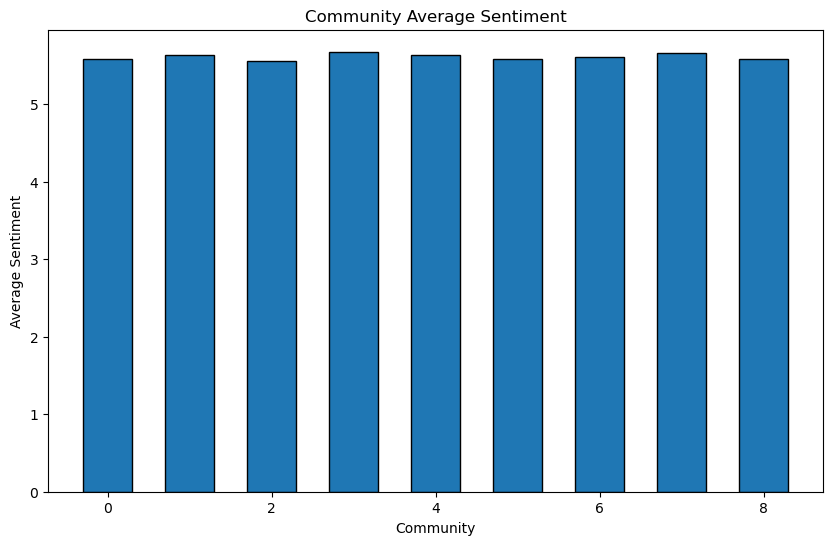

In [29]:
communities = set(partition.values())
community_avg_sentiment = {}

for community in communities:
    community_nodes = [node for node, comm in partition.items() if comm == community]
    
    total_sentiment = sum([rap_graph_with_sentiment.nodes[node]['sentiment'] for node in community_nodes])
    average_sentiment = total_sentiment / len(community_nodes)
    
    community_avg_sentiment[community] = average_sentiment

create_histogram(community_avg_sentiment, "Community Average Sentiment", "Community", "Average Sentiment")

> **📊 Graph**: The bar chart depicts the average sentiment for communities found in Part 3. As we can see there is no a big variation between communities sentiment. That align with previous result which can indicate that wiki pages have similar sentiment when measuring using the labMIT word approach.